In [ ]:
# from data_downloader import download_dataset
# # URL of the SUSY dataset
# url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'

# # Directory to save the dataset
# directory = 'data'

# # Path to save the downloaded file
# compressed_file_name = 'SUSY.csv.gz'
# uncompressed_file_name = 'SUSY.csv'

# download_dataset(directory, url, compressed_file_name, uncompressed_file_name)

In [1]:
from data_datasets import higgs,susy,cod_rna
N = 10000
data = "susy"
# data = "higgs"
# data = "cod_rna"
####################

if data == "higgs":
    X_train, X_test, y_train, y_test = higgs(N)
elif data == "susy":
    X_train, X_test, y_train, y_test = susy(N)
elif data == "cod_rna":
    X_train, X_test, y_train, y_test = cod_rna(N)

print("\nDataset:", data)
print("--------\nShape train data:", X_train.shape)
print("Shape test data:", X_test.shape)


Dataset: susy
--------
Shape train data: (10000, 18)
Shape test data: (10000, 18)


## KRR witout Preconditioning

In [2]:
from pkrr import PKRR
from math import *
gamma = sqrt(1./6)
mu = N*1e-7

model1 = PKRR(mu=mu, gamma=gamma, rank=50)

model1.fit(X_train=X_train, y_train=y_train, maxiter=300)
print(model1.report)
y_predict_1 = model1.predict(X_test)
print(
    f"Correct: {sum(y_test==y_predict_1 )} , Incorrect: {sum(y_test!=y_predict_1)}")

Training is done in 246 iteration with CG-method. Precondition: without precondition
Correct: 7138 , Incorrect: 2862


## KRR with Nystrom as Preconditioner

In [3]:
from pkrr import PKRR
model2 = PKRR(mu=mu, rank=50, gamma=gamma, prec="nystrom")

model2.fit(X_train=X_train, y_train=y_train, maxiter=300)
print(model2.report)
y_predict_2 = model2.predict(X_test)
print(
    f"Correct: {sum(y_test==y_predict_2 )} , Incorrect: {sum(y_test!=y_predict_2)}")

Training is done in 202 iteration with CG-method. Precondition: nystrom
Correct: 7138 , Incorrect: 2862


# KRR with RPCholesky as Preconditioner

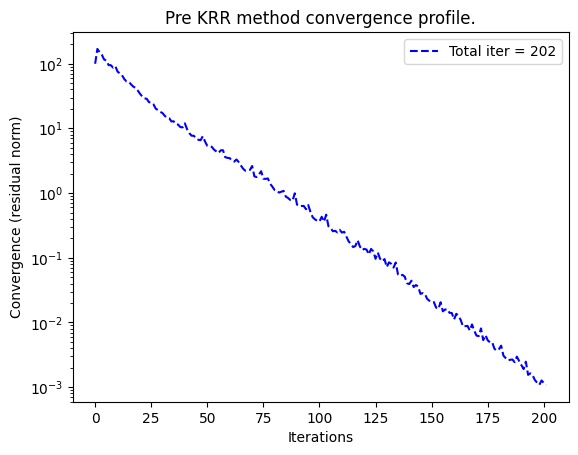

In [5]:
# """Show plot with convergence profile - normalised residual vector vs iteration."""
import matplotlib.pyplot as plt
plt.title('Pre KRR method convergence profile.')
plt.ylabel('Convergence (residual norm)')
plt.xlabel('Iterations')

m_res = model2.residuals
plt.semilogy(range(len(m_res)), m_res, 'b--')
plt.legend(['Total iter = ' + str(len(m_res))])
# plt.show()

In [6]:
model1.residuals[-1]

0.0011779144654568826